<a href="https://colab.research.google.com/github/njagaty/Machine-leaning-Projects/blob/main/Regression_Analysis_on_Compressive_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("OM SAIRAM")

OM SAIRAM


## **Regression Analysis on Compressive Strength**

Regression Analysis for Predicting the Compressive Strength of Concrete

The experimental approach for evaluating the compressive strength of concrete mixture is rather time consuming and expensive
We have to keep seprate quatity from the concrete mixture to carry out experimental procedure,like hardening the concrete cube for 24 hrs and to keep immersed in underwater for certain number of days ranging from (7-28 days)
Then at last compressive test is carried out which is a tiresome process but based on the gathered data on previous testing we can predict its compressive strength approximately to the exprerimental approach

In this notebook we will carry out the regression alogorithm to predict the compressive strength of concrete mixture based on its features which are the proportion of individual components mixed (cement,water,aggregate,..etc)

In [3]:
from google.colab import files
uploaded=files.upload()

Saving concrete_data.csv to concrete_data.csv


In [4]:
import numpy as np

# For Data Frame manipulation
import pandas as pd

# For Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To enable matplot visulization
%matplotlib inline

In [5]:
# The imported csv file(DataFrame) will be stored under the object called concrete
concrete=pd.read_csv('/content/concrete_data.csv')

# By calling .head() attribute on dataset we will get first 5 rows
concrete.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
# We will call .describe() attribute on the concrete datframe to get basic statistical data about every features on dataframe
concrete.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
# We will look in to the no.of entries and data types of entries of the dataframe by calling .info() on the object(concrete)
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# DATA CLEANING

In this section we will normalize the dataset by removing unnescessary data which have no influence on the final output

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

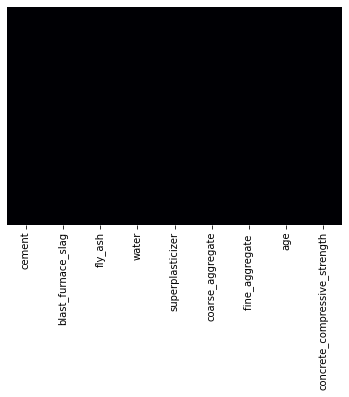

In [8]:
# We will check for the presence of null values by creating heatmap by using data in boolean format which is concrete.isnull()
sns.heatmap(concrete.isnull(),yticklabels=False,cbar=False,cmap='magma')
concrete.isnull().sum()

Since ther is no color variation on the heatmap it is clear that there is no null values on the dataset

In [9]:
# we will check out features by calling .columns on the object(concrete)
concrete.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [10]:
# we will check for duplicate data on the dataframe by calling .duplicated() on the object(concrete)
concrete.duplicated().sum()

25

In [11]:
# we will check wether the entire row is repeated in the form of boolean output
duplicates=concrete.duplicated()
duplicates.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [12]:
# We will drop duplicated rows by calling drop_duplicates() attribute on the object(concrete)
concrete.drop_duplicates(inplace=True)

In [13]:
# We will check for duplicates to confirm wether all the duplicates are removed
concrete.duplicated().sum()

0

DATA VISUALISATION
In this section we will see if we can get any insigths regarding the features by using graphical representation

Text(0.5, 1.0, 'correlaton amoung features on concrete mixture')

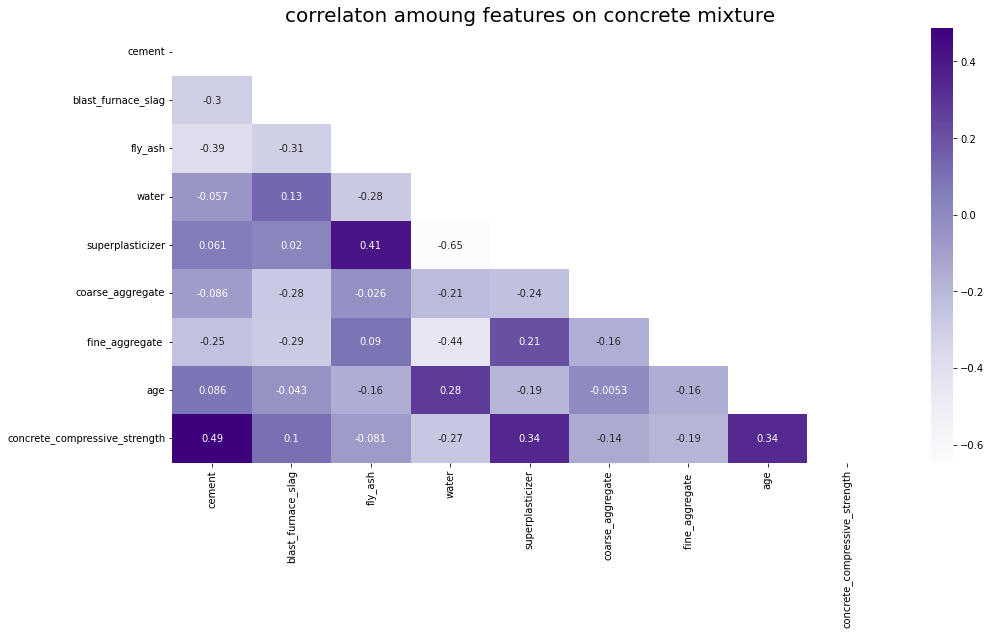

In [14]:
# We will use heatmap to draw correlation amoung every features with respect to one another

# we will create a space and set the graph size 
plt.figure(figsize=(16,8))

# We will use the variable called mask to remove the values across heatmap diagnolly as it is same on both sides
mask=np.triu(np.ones_like(concrete.corr()))

# We will creat a heatmap by calling .heatmap on sns(seaborn) library
sns.heatmap(concrete.corr(),annot=True,cmap='Purples',mask=mask)

# We will set title by callig .title on the plot
plt.title('correlaton amoung features on concrete mixture',fontsize=20)

# **Inference from Heatmap**
As we can see most of the input features exhibit negative correlation with one other, only few of them are positively correlated with one another.
This indicates if we increase the input features by one unit, the correlated feature corresponding to the input feature will also increase by one unit and it will exhibit decrease fashion on one feature if we decrease other by one unit for positively correlated features.
For negatively correlated features it will exhibit inverse relation, if we increase one feature by one unit the other will decrease by one unit and vice versa
since there is no strong correlation between features we can not implement interaction term to increase accuracy of base model.

<AxesSubplot:>

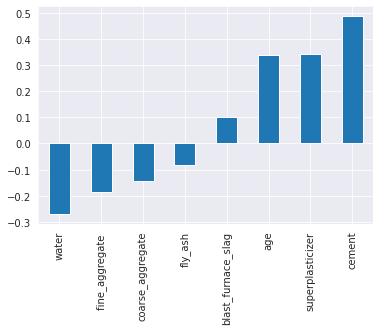

In [19]:
# We will create the correlation individually for every input features with respect to final output(compressice dtrength)

# We will set the background as dark by using .set_style()
sns.set_style('darkgrid')

# Bar plot correlation
concrete.corr()['concrete_compressive_strength'].sort_values()[:-1].plot(kind='bar')

# **Inference from barplot correlation**
As we can see we can increase the compressive strength by increasing the input features like slag,superelastic,cement,age but we can not increase it indefnitelly beacause the concrete needs other ingredients as well.
We can also increase the compressive strength by decreasing the input features like water,fine aggregate,coarse aggregate,ash but we can not decrease it indefnitelly beacause the concrete needs sufficient amount of them as well.

# **Model 1: Linear Regression**

# **4. Train Test Split**
In this section we will split data as 2-way split not a 3-way split in form of train data and test data.
The train and test data is split in ( 70 % and 30 % ) proportion.

In [22]:
# We will create x and y variable from the datasets  

# x resemble input feature
X=concrete.drop('concrete_compressive_strength',axis=1)

#y resembles output feature
y=concrete['concrete_compressive_strength']

In [23]:
# To carry out the split we will import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [24]:
# We will call split command
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# **5. Model building**
We will import LinearRegression from sklearn.linear_model# New Section

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# We will create an object for linear regression as lr
lr=LinearRegression()

In [27]:
# We will fit the training data to train the model(labelled data) by using .fit() call 
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
# We will see the coefficient of linaer equation once the model has trained
lr.coef_

array([ 0.11333916,  0.09121247,  0.0873194 , -0.18264841,  0.1825278 ,
        0.01182592,  0.00842157,  0.1216025 ])

In [29]:
# We will create dataframe as df with coefficent as data for better undestanding
df=pd.DataFrame(data=lr.coef_,index=X.columns,columns=['coef'])

In [30]:
# We will see the dataframe by calling its name
df

,coef
cement,0.113339
blast_furnace_slag,0.091212
fly_ash,0.087319
water,-0.182648
superplasticizer,0.182528
coarse_aggregate,0.011826
fine_aggregate,0.008422
age,0.121603


In [31]:
# We will predict the output for test data by calling .predict() call
prediction=lr.predict(X_test)

Text(0, 0.5, 'y_test')

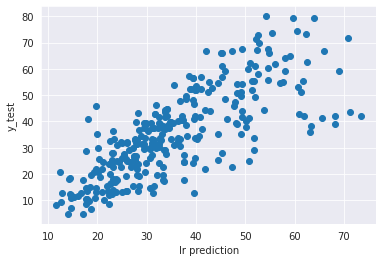

In [32]:
# We will see the relationship between the predicted value and true test value in graphical representation
plt.scatter(x=prediction,y=y_test)

# We will set x label on plot(plt)
plt.xlabel('lr prediction')

# We will set y label on plot(plt)
plt.ylabel('y_test')

There exists no strong linear reationship between predicted value and true value which shows that the accuracy of the model is poor

# **6. Model evaluation**
We will import mean_squared_error,r2_score from metrics# New Section

In [33]:
from sklearn.metrics import mean_squared_error,r2_score

In [34]:
print('RMSE',np.sqrt(mean_squared_error(y_test,prediction)))
print('R squared',r2_score(y_test,prediction))

RMSE 10.542162031450934
R squared 0.5963564612207315


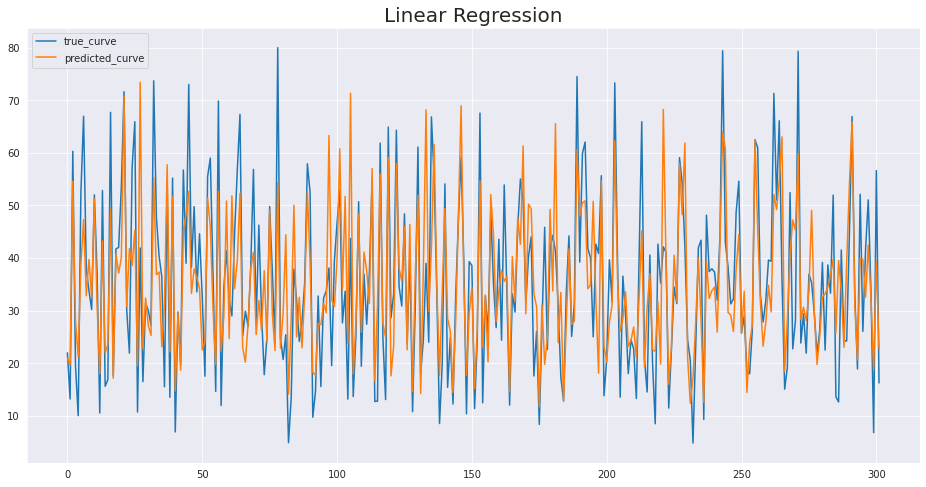

In [35]:
# we will create a space and set the graph size 
plt.figure(figsize=(16,8))

# We will create plot using labelled data
plt.plot(np.arange(len(X_test)),y_test.values,label='true_curve')

# We will create plot using predicted data
plt.plot(np.arange(len(X_test)),prediction,label='predicted_curve')

# We will set the title
plt.title('Linear Regression',fontsize=20)
plt.legend()

As we can see there is high variance between the predicted value and true value

In [36]:
# We will import statsmodel library
import statsmodels.api as sm

In [37]:
# We will define the fuction as linear_regression
def linear_Regression(x,y):
    x=sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    print(model.summary())

In [38]:
# We will call the function to get result
linear_Regression(X,y)

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.604
Model:                                       OLS   Adj. R-squared:                  0.601
Method:                            Least Squares   F-statistic:                     189.8
Date:                           Sat, 25 Feb 2023   Prob (F-statistic):          2.40e-194
Time:                                   19:10:51   Log-Likelihood:                -3764.4
No. Observations:                           1005   AIC:                             7547.
Df Residuals:                                996   BIC:                             7591.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# **Inference from model**
The R-squared value is 60.4 % which states around 60.4 % of prportion of variability in data can be explained by linear regression model,it is the most important parameter for model evaluation higher the value better is the fit
The p-value is an important measure for evaluating variables.closer is the p-value to 1,lesser the variable has to do with the label variable , in our model all parameter have more or less equal performance.
Final expression
compressive strength= -17.918 +(0.01172 x cement)+(0.0995 x slag)+(0.0856 x ash)-(0.1522 x water)+(0.2849 x superplastic)+(0.0157 x coarseagg)+(0.0183 x fineagg)+(0.1122 x age)
In absence of all parameter the compressive strength will decrease by 17.91 , the negative coefficent of water states that if we increase water presence the compressive strength decrese , the positive coefficient* states that if we increase cement by 1 unit the compressive strength will increase by 0.01172 units.# New Section

# **Model 2: Random Forest Regression**
In this section we will carry out different regression model for better prediction on same data train and test data is split to ( 70 % and 30 % ) proportion.# New Section

# **5.1. Model building without grid search (random parameters)**
We will import RandomForestRegressor from sklearn.ensemble

We will set random parameters for random forest regression.# New Section

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
# We will create an object for random regression as rf with 60 sub trees
rf=RandomForestRegressor(n_estimators=60,random_state=42)

In [47]:
# We will fit the training data to train the model(labelled data) by using .fit() call 
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=60, random_state=42)

In [48]:
# We will predict the output for test data by calling .predict() call
rf_prediction=rf.predict(X_test)

Text(0, 0.5, 'y_test')

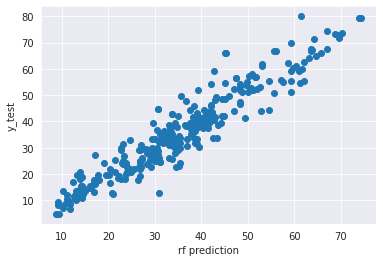

In [49]:
# We will see the relationship between the predicted value and true test value in graphical representation
plt.scatter(rf_prediction,y_test)

# We will set x label on plot(plt)
plt.xlabel('rf prediction')

# We will set y label on plot(plt)
plt.ylabel('y_test')

There exist a strong linear relationship between the true value and predicted value shows that accuracy of the model is good

# **6.1. Model evaluation**

In [50]:
print('RMSE',np.sqrt(mean_squared_error(y_test,rf_prediction)))
print('R squared',r2_score(y_test,rf_prediction))

RMSE 5.293617696106944
R squared 0.8982243750178427


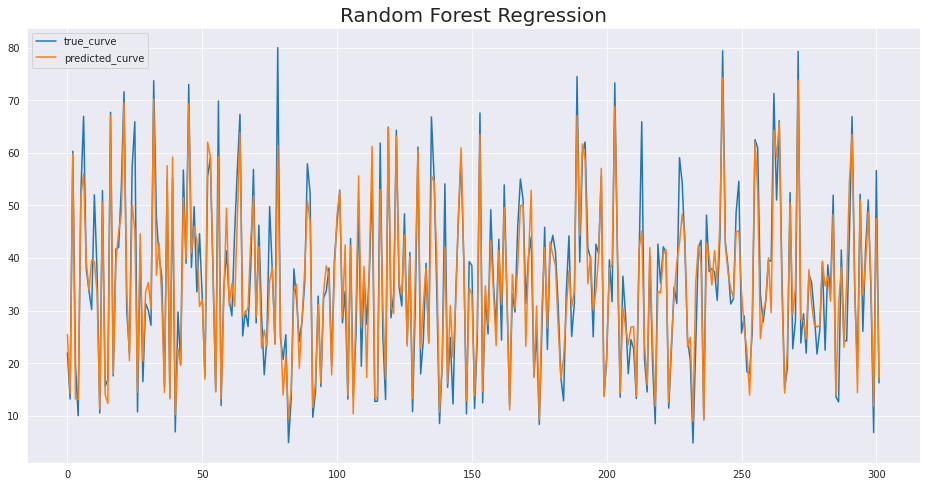

In [51]:
# We will create a space and set the graph size 
plt.figure(figsize=(16,8))

# We will create plot using labelled data
plt.plot(np.arange(len(X_test)),y_test.values,label='true_curve')

# We will create plot using predicted data
plt.plot(np.arange(len(X_test)),rf_prediction,label='predicted_curve')

# We will set the title
plt.title('Random Forest Regression',fontsize=20)
plt.legend()

The true curve and predicted curve overlap with one another shows the variance of random regression is lower than linear regression.

In [53]:
# We will call the .feature_importances_ on the object rf
rf.feature_importances_

array([0.32240031, 0.06980909, 0.01104683, 0.11211208, 0.06091848,
       0.03358575, 0.05285356, 0.3372739 ])

In [54]:
# We will create dataframe as f_importance with rf_importance as data for better undestanding
f_importance=pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['value'])

# We will see the dataframe by calling its name
f_importance

,value
cement,0.322400
blast_furnace_slag,0.069809
fly_ash,0.011047
water,0.112112
superplasticizer,0.060918
coarse_aggregate,0.033586
fine_aggregate,0.052854
age,0.337274


As we can see the input feature age and cement are more important than other on predicting compressive strength.

5.1.1. Model building with grid searched parameters
We will do grid search to find best parameters for random forest regression

In [55]:
# number of trees in random forest
n_estimators=np.arange(50,500,25)
# no of features to consider at every split
max_features=['sqrt','log2']
# minimum no of samples required to split a node
min_samples_split=[2,4]
# mimimum no of samples required at each leaf node
min_samples_leaf=[1,2]
# methode of selecting samples for training eeach tree
bootstrap=[True,False]

In [56]:
# We will crate parameter grid
param_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "bootstrap":bootstrap}

In [57]:
rf=RandomForestRegressor()

In [58]:
# W e will import Gridsearchcv from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# We will create object called rf_grid
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [59]:
# W e will fit train data 
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475])},
             verbose=2)

In [65]:
# We will get the best parameters by calling .best_params_ on object(rf_grid)
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 475}

In [60]:
# We will get the best parameters by calling .best_params_ on object(rf_grid)
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 475}

In [64]:
# We will predict create rf with best parameters
rf=RandomForestRegressor(bootstrap= False,
 max_features= 'log2',
 min_samples_leaf= 1,
 min_samples_split=4,
 n_estimators=200)

In [66]:
# We will fit train data by applying best parameters
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=4,
                      n_estimators=200)

In [67]:
# We will predict x_test data by .predict call
pred=rf.predict(X_test)

# **6.1.1. Model evaluation**

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the model and fit to the training data
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Generate predictions on the test data
pred = rf.predict(X_test)

# Calculate evaluation metrics
print('RMSE', np.sqrt(mean_squared_error(y_test, pred)))
print('R squared', r2_score(y_test, pred))


RMSE 5.377907959624617
R squared 0.8949574245083308


In [63]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R squared',r2_score(y_test,pred))

RMSE 5.377907959624617
R squared 0.8949574245083308


In [68]:
print('R squared value on train data =',rf_grid.score(X_train,y_train))
print('R squared value on test data =',rf_grid.score(X_test,y_test))

R squared value on train data = 0.996349080951753
R squared value on test data = 0.9253446546832154


# **Inference from model**

Model accuracy comparrison
For model that builded with out grid searched parameter i.e. random parameter the R-squared value is 91.5 % which states around 91.5 % of prportion of variability in data can be explained by Random Forest regression model,it is the most important parameter for model evaluation higher the value better is the fit.
For model that builded with out grid searched parameter i.e. random parameter the R-squared value is 92.0 % which states around 92.0 % of prportion of variability in data can be explained by Random Forest regression model,it is the most important parameter for model evaluation higher the value better is the fit.
Result: The model accuracy can be fine tuned futher to get better accuracy by extending the parameter range on random forest regression
Since Random forest regression uses bagging technique to split data amoung various decision tree,we are able to achive better accuracy.
bagging technique is the reason why we may be reduce that much variance that happens during prediction.

# **Summary**
We have studied two modes of regression in this notebook to study the relationship between the compressive strength of concrete mixture and other 8 features
First we have gone through linear regression which does not fit well and correlation between features is not that much strong we can not implement interaction term to increase accuracy of our model.
So we have gone for random forest regrssion which have no need interaction term to increase accuracy of our model.# New Section